<a href="https://colab.research.google.com/github/eldadHaber/EOAS555/blob/main/eoas55_sep_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt

#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim

In [ ]:
def dudt(u,h):
  # u = [u(0), u(h), u(2*h) ....]
  # u is an n vector
  v = (u[1:] - u[:-1])/h
  return v

In [ ]:
# test
# get a grid
pi = 3.1415926535
for j in range(8):
  n = 2**(3+j)
  x = torch.linspace(0,1,n+1)
  u = torch.sin(2*pi*x)
  up = 2*pi*torch.cos(2*pi*x)

  h = x[1] - x[0]
  upc = dudt(u,h)

  r = (up[:-1] - upc).norm()/torch.sqrt(torch.tensor([n]))
  print(j, h.item(), r.item())
#plt.plot(x,up)
#plt.plot(x[:-1],upc)



0 0.125 1.7150253057479858
1 0.0625 0.8686274290084839
2 0.03125 0.4357120096683502
3 0.015625 0.21803104877471924
4 0.0078125 0.10903740674257278
5 0.00390625 0.054521430283784866
6 0.001953125 0.02726108767092228
7 0.0009765625 0.013630666770040989


In [ ]:
# test
# get a grid
pi = 3.1415926535
for j in range(8):
  n = 2**(3+j)
  x = torch.linspace(0,1,n+1)
  h = x[1] - x[0]

  xc = torch.linspace(h/2,1-h/2,n)

  u = torch.sin(2*pi*x)
  up = 2*pi*torch.cos(2*pi*xc)

  
  upc = dudt(u,h)

  r = (up - upc).norm()/torch.sqrt(torch.tensor([n]))
  print(j, h.item(), r.item())
#plt.plot(x,up)
#plt.plot(x[:-1],upc)


0 0.125 0.11331421881914139
1 0.0625 0.028492800891399384
2 0.03125 0.007133515086025
3 0.015625 0.001784040010534227
4 0.0078125 0.0004462140495888889
5 0.00390625 0.00011367771367076784
6 0.001953125 4.332800017436966e-05
7 0.0009765625 5.1524362788768485e-05


In [ ]:
# forward Euler
def ForEu(func,h,t,theta, y0,n):
  y = y0
  Y = torch.zeros(n+1)
  Y[0] = y0
  for i in range(n):

    z = func(y,t,theta)
    y = y + h*z
    Y[i+1] = y
  return Y


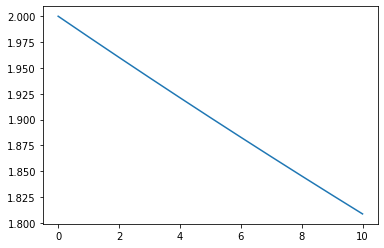

In [ ]:
def myfun(y,t,theta):
  return -theta*y

Y = ForEu(myfun,0.01,[],1.0, 2.0,10)
plt.plot(Y)